In [15]:
import keras
import numpy as np
import matplotlib.pyplot as plt

로이터 기사 데이터 셋을 로딩합니다.

In [16]:
from keras.datasets import reuters 

In [30]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000) #자주 사용하는 단어 10000개만 불러온다. 

In [18]:
train_data.shape

(8982,)

In [19]:
test_data.shape

(2246,)

In [20]:
train_data[0], train_labels[0]

([1,
  2,
  2,
  8,
  43,
  10,
  447,
  5,
  25,
  207,
  270,
  5,
  3095,
  111,
  16,
  369,
  186,
  90,
  67,
  7,
  89,
  5,
  19,
  102,
  6,
  19,
  124,
  15,
  90,
  67,
  84,
  22,
  482,
  26,
  7,
  48,
  4,
  49,
  8,
  864,
  39,
  209,
  154,
  6,
  151,
  6,
  83,
  11,
  15,
  22,
  155,
  11,
  15,
  7,
  48,
  9,
  4579,
  1005,
  504,
  6,
  258,
  6,
  272,
  11,
  15,
  22,
  134,
  44,
  11,
  15,
  16,
  8,
  197,
  1245,
  90,
  67,
  52,
  29,
  209,
  30,
  32,
  132,
  6,
  109,
  15,
  17,
  12],
 3)

In [31]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [32]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [33]:
train_labels[0] 

3

### 데이터의 준비 

In [34]:
def vectorize_sequences(sequences, dimension=10000):
  
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1 

  return results 

# 데이터의 변환 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [35]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

### 라벨 데이터의 엔코딩 

In [36]:
def to_one_hot(labels, dimension=46): #토픽의 개수가 46 
  results = np.zeros((len(labels),dimension))

  for i, sequence in enumerate(labels):
    results[i, sequence] = 1

  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [37]:
# cateogorical 데이터로 변환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [38]:
# 신경망을 구성합니다. 

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [39]:
 model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [40]:
# 훈련 데이터의 준비

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [41]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 38ms/step - loss: 2.5424 - accuracy: 0.5204 - val_loss: 1.6788 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.3827 - accuracy: 0.7048 - val_loss: 1.2715 - val_accuracy: 0.7290
Epoch 3/20
16/16 [==============================] - 0s 29ms/step - loss: 1.0254 - accuracy: 0.7851 - val_loss: 1.0948 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.8006 - accuracy: 0.8350 - val_loss: 1.0017 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6368 - accuracy: 0.8662 - val_loss: 0.9417 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 28ms/step - loss: 0.5013 - accuracy: 0.8965 - val_loss: 0.9352 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.4028 - accuracy: 0.9172 - val_loss: 0.9340 - val_accuracy: 0.7910
Epoch 8/20
16

In [42]:
# 학습 결과를 가져온다. 
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

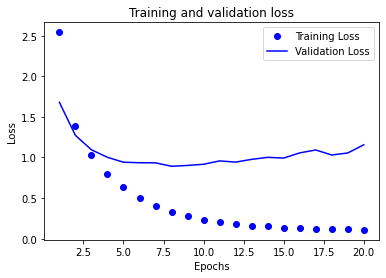

In [43]:
# 결과를 시각화 한다. 
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

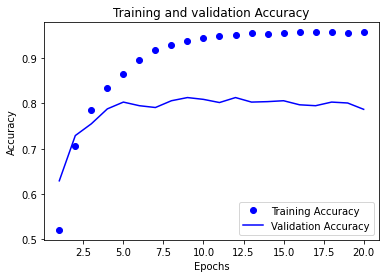

In [44]:
# 결과를 시각화 한다. 
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()